In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
url = "https://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
soup = BeautifulSoup(html, 'lxml')

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [8]:
webpage_links = soup.find_all('a')
for link in webpage_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [9]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>36:45</td>
<td>
<img class="teamThumbs" src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

              

In [10]:
import re
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
type(row_td)

[]
[Finishers:, 577]
[Male:, 414]
[Female:, 163]
[]
[1, 814, 

                    JARED WILSON

                , M, TIGARD, OR, 36:21, 5:51, 36:24, ]
[2, 573, 

                    NATHAN A SUSTERSIC

                , M, PORTLAND, OR, 36:42, 5:55, 36:45, 

                            INTEL TEAM F
                        ]
[3, 687, 

                    FRANCISCO MAYA

                , M, PORTLAND, OR, 37:44, 6:05, 37:48, ]
[4, 623, 

                    PAUL MORROW

                , M, BEAVERTON, OR, 38:34, 6:13, 38:37, ]
[5, 569, 

                    DEREK G OSBORNE

                , M, HILLSBORO, OR, 39:21, 6:20, 39:24, 

                            INTEL TEAM F
                        ]
[6, 642, 

                    JONATHON TRAN

                , M, PORTLAND, OR, 39:49, 6:25, 39:55, ]
[7, 144, 

                    GEORGE TOTONCHY

                , M, PORTLAND, OR, 40:04, 6:27, 40:17, ]
[8, 395, 

                    BENJAMIN C CHAFFIN

                , M, PORTLAND, OR, 

NameError: name 'row_td' is not defined

In [11]:
df = pd.DataFrame(list_rows)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [12]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [13]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [14]:
df1[0] = df1[0].str.strip('[')
df1[2] = df1[2].str.strip()
df1[1] = df1[1].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [15]:
col_labels = soup.find_all('th')

In [16]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [17]:
df_labels = pd.DataFrame(all_header)
print(df_labels)

                                                   0
0  [Place, Bib, Name, Gender, City, State, Chip T...


In [18]:
df_labels_split  = df_labels[0].str.split(',', expand = True)
df_labels_split.head()

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [19]:
data_frames = [df_labels_split, df1]

In [20]:
df4 = pd.concat(data_frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]


In [21]:
df_a = df4.iloc[0].str.strip()
df_a

0       [Place
1          Bib
2         Name
3       Gender
4         City
5        State
6    Chip Time
7    Chip Pace
8     Gun Time
9        Team]
Name: 0, dtype: object

In [23]:
df5 = df4.rename(columns=df4.iloc[0].str.strip())
df5.head()


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None


In [108]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
[Place       583 non-null object
Bib          581 non-null object
Name         578 non-null object
Gender       578 non-null object
City         578 non-null object
State        578 non-null object
Chip Time    578 non-null object
Chip Pace    578 non-null object
Gun Time     578 non-null object
Team]        578 non-null object
dtypes: object(10)
memory usage: 50.1+ KB


In [120]:
df6 = df5.dropna(axis=0, how='any').drop(df5.index[0])

df6.rename(columns={'[Place': 'Place'},inplace=True)
df6.rename(columns={'Team]': 'Team'},inplace=True)
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [121]:
df6['Team'] = df6['Team'].str.strip(']')
df6['Team'] = df6['Team'].str.strip()
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F


In [122]:
df6.shape
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 5 to 581
Data columns (total 10 columns):
Place        577 non-null object
Bib          577 non-null object
Name         577 non-null object
Gender       577 non-null object
City         577 non-null object
State        577 non-null object
Chip Time    577 non-null object
Chip Pace    577 non-null object
Gun Time     577 non-null object
Team         577 non-null object
dtypes: object(10)
memory usage: 49.6+ KB


In [149]:
time_list = df6['Chip Time'].tolist()
time_mins = []
for i in time_list:
    #print(i)
    if len(i.split(':')) == 2:
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
    elif len(i.split(':')) == 3:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
print(len(time_mins))

577


In [150]:
df6['Runner_minutes'] = time_mins
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_minutes
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F,39.350000


In [151]:
df6.describe(include=[np.number])

,Runner_minutes
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x112bb6c18>],
 <a list of 1 Text xticklabel objects>)

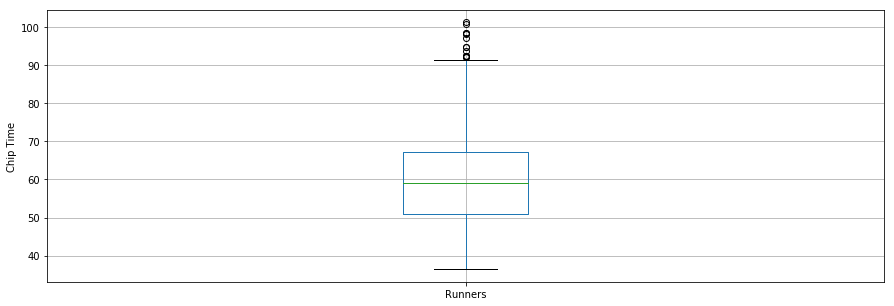

In [156]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df6.boxplot(column='Runner_minutes')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


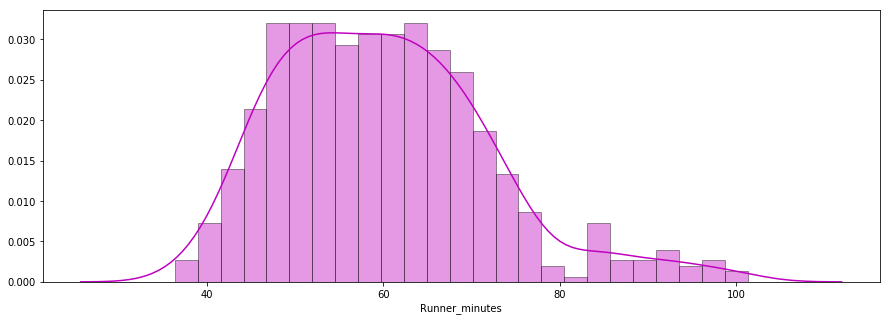

In [161]:
x = df6['Runner_minutes']
ax = sns.distplot(x, hist=True, kde=True,rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

/Users/JCReynoldsMacbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


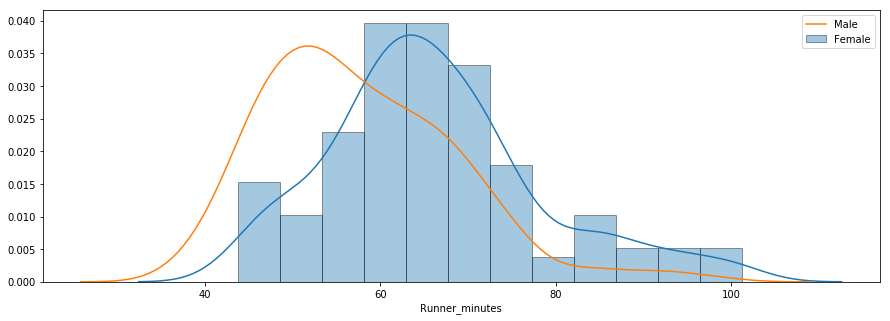

In [165]:
f_fuko = df6.loc[df6['Gender']==' F']['Runner_minutes']
m_fuko = df6.loc[df6['Gender']==' M']['Runner_minutes']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [166]:
gender_stats = df6.groupby("Gender", as_index=True).describe()
print(gender_stats)

       Runner_minutes                                                         \
                count       mean        std        min        25%        50%   
Gender                                                                         
 F              163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M              414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
 F      72.058333  101.300000  
 M      64.804167   98.516667  
